<h1>Importing Libraries</h1>

In [2]:
#Importing Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import os

from sklearn.model_selection import train_test_split
import pickle

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import sklearn.metrics as metrics

from sklearn.model_selection import KFold

warnings.filterwarnings('ignore')


#Saving a array of models
def save_item(model,filename):
    pickle.dump(model, open(filename, 'wb'))
    



<h2>Data set loading</h2>

In [3]:
#Loading data set

data = pd.read_csv('Crop_recommendation.csv')

data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


<h2>EDA</H2>

In [4]:
#Data Exploration:

print("Number of Instances and Attributes:", data.shape)
print('\n')

print('Dataset columns:',data.columns)
print('\n')

print('Data types of each columns: ', data.info())

Number of Instances and Attributes: (2200, 8)


Dataset columns: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
Data types of each columns:  None


In [40]:
#Target label values

print("Different crops are:\n")
for i in data['label'].unique():
    print("   "+i)

print("\n\nTotal no of different crops are:" , len((data['label'].unique())))

Different crops are:

   rice
   maize
   chickpea
   kidneybeans
   pigeonpeas
   mothbeans
   mungbean
   blackgram
   lentil
   pomegranate
   banana
   mango
   grapes
   watermelon
   muskmelon
   apple
   orange
   papaya
   coconut
   cotton
   jute
   coffee


Total no of different crops are: 22


<h2>Data preprocessing</h2>

<h3>Handling duplicates</h3>

In [5]:
#Checking Duplicates:

count_dups = data.duplicated().sum()
print("Number of Duplicates: ", count_dups)
if count_dups >= 1:
    data.drop_duplicates(inplace=True)
    print('Duplicate values removed!')
else:
        print('No Duplicate values')

Number of Duplicates:  0
No Duplicate values


<h3>Handling missing values</h3>

In [7]:
#Checking NULL values

data.isnull().sum() #No null values

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<h2>Data Visualization</h2>

<AxesSubplot: >

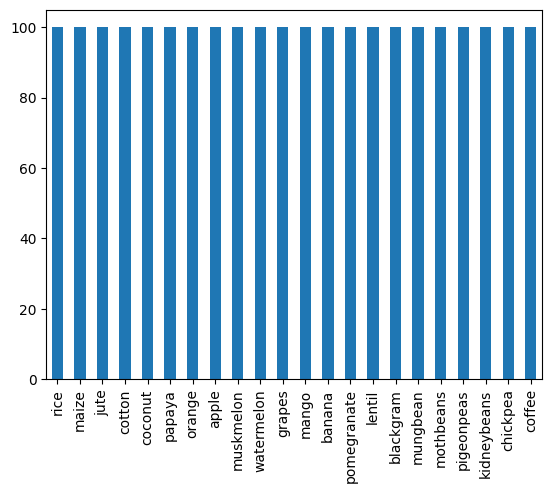

In [43]:
#Crop vs count ( no of instances )

data['label'].value_counts().plot(kind='bar')

<Axes: >

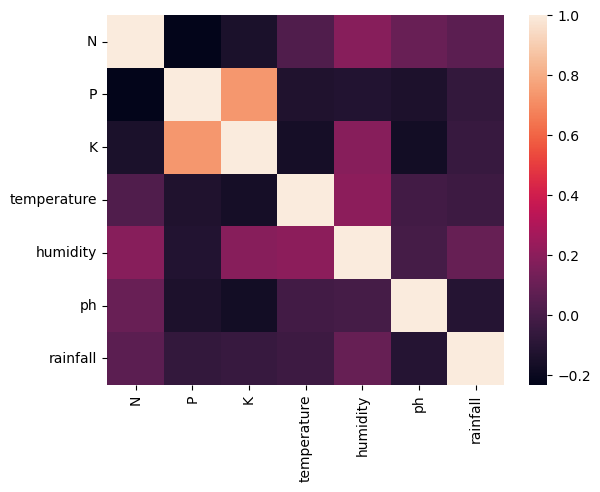

In [8]:
#Correlation Matrix 

sns.heatmap(data.corr())

<h2>Model Building</h2>

In [9]:
#Data Splitting

target = 'label'

X = data.drop(target, axis=1)
Y = data[target]

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.3)


<h3>Data Transformation</h3>

In [10]:
#Normalization using standard scaler

normalization = StandardScaler()
normalization.fit(X)

save_item(normalization , 'normalization.pkl')



In [20]:
# Creating 5 random subsets using K-FOLD

kf = KFold(n_splits = 5 , shuffle=True)

array = []
for index in kf.split(data):
  array.append(index[1])

set1 = array[0]
set2 = array[1]
set3 = array[2]
set4 = array[3]
set5 = array[4]

df1 = data.iloc[set1]
df2 = data.iloc[set2]
df3 = data.iloc[set3]
#df4 = data.iloc[set4]
df5 = data.iloc[set5]

In [21]:
Models = {}

Models['Naive Bayes'] =[ GaussianNB() , df1]

Models['SVM'] = [SVC() , df2]

Models['KNN'] = [ KNeighborsClassifier() , df3]

#Models['Decision Tree'] = [ DecisionTreeClassifier() , df4]

Models['Random Forest'] = [ RandomForestClassifier() , df5]

In [22]:
for model in Models:
    data = Models[model][1]
    
    X = data.iloc[:,:-1]
    Y = data.iloc[:,-1]
    
    X = normalization.transform(X)
    
    Models[model][0].fit(X , Y)

In [23]:
#Testing

X_test = normalization.transform(X_test)

accuracy_array = []
confusion_matrix_array = []

print("\nAccuracy of the models are:\n")

for i in Models:
    
    testing = Models[i][0].predict(X_test)
    
    v = accuracy_score(testing , Y_test) * 100
    
    confusion_matrix_array.append(confusion_matrix(testing , Y_test))
    
    accuracy_array.append(v)
    
    print(i ,":",v)
    


Accuracy of the models are:

Naive Bayes : 5.757575757575758
SVM : 4.242424242424243
KNN : 3.787878787878788
Random Forest : 3.939393939393939


<Axes: >

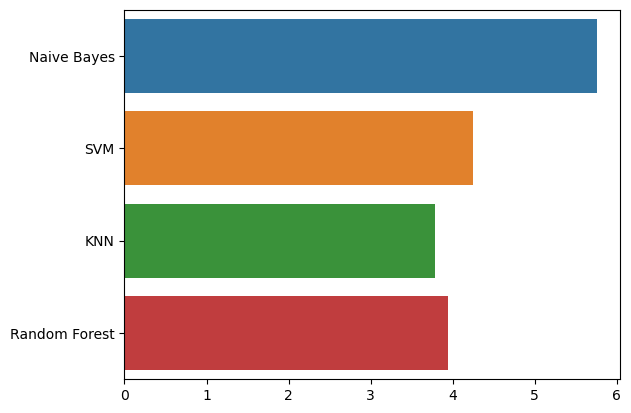

In [24]:
#Comparision of accuracy's

model_names = list(Models.keys())
sns.barplot(y = model_names , x = accuracy_array)

In [52]:
#Saving a array of models

array = list(Models.values())
save_item(array, 'model.pkl')